# Homework 3

(๑• .̫ •๑)

Your last pokemon adventure went well, but you aren't quite the very best like no one ever was. Faithful to your data scientist ways, you decide to further analyse your pokedex to improve your training.

The data can be found under `pokedex/pokemons.csv`, and is the same as assignment 1. Run the cell below to get an overview of the dataset:

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('pokedex/pokemons.csv')
df.head()

/Users/amine/.local/share/virtualenvs/practical-data-scientist-umj5maBJ-python/lib/python3.9/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## Problem 1

Analysing and grouping "smart" pokemons by `Type 1` wasn't very successful last assignment: we got a headache from trying to train a Psyduck. Since then however, we learnt a powerful unsupervised learning method for analysing **clusters** in our datasets.

💪 **Task: Use k-Means clustering to find 4 clusters in the pokemon dataset, and store the predictions in a vector called `y_kmeans`.**  
Pro-tip 1: You should only take into account the `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, `Speed`, and `HP` columns. 


Pro-tip 2: Please use the `random_state=42` argument when constructing your sklearn class, to make sure your results are reproducible. Marks won't be taken off for using the wrong random seed, but the unit tests won't pass !  

Pro-tip 3: We have seen in lectures that sklearn expects NumPy `ndarray`s as argument to its training and prediction methods. Whilst that is true, it can also accept pandas `DataFrame`s directly, since these are `ndarray` wrappers. You can use whichever you prefer.

In [2]:
from sklearn.cluster import KMeans

#np.asarray([attack,defense,sp_atk,sp_def,speed]).reshape(1, 5)

pokemon = df[['Attack','Defense','Sp. Atk','Sp. Def','Speed', 'HP']]

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(pokemon.to_numpy())

y_kmeans = kmeans.predict(pokemon)

In [3]:
def test_kmeans():
    assert len(y_kmeans) == 800, f'The size of your prediction vector is wrong: {len(y_kmeans)}. There should be 800, one per pokemon.'
    unique_clusters = len(np.unique(y_kmeans))
    assert unique_clusters == 4, f'There should 4 unique clusters, your prediction vector has {unique_clusters}'
    assert y_kmeans.mean() == 1.53875, f'Something is not quite right with your prediction vector. Have you used a random seed of 42?'
    print('Success! 🎉')
    return

test_kmeans()

Success! 🎉


## Problem 2

Now that we have clustered our pokemons, we'd like to explore these groups. Specifically, we'd like to know the mean stats of each cluster, so we can compare their average strengths and weaknesses.


💪 **Task: Group the pokemons by cluster, and calculate the mean statistics of each group. Save this in a `DataFrame` called `cluster_means`. For example, you should be able to clearly read the average `Defense` of cluster 2 in your `cluster_means` `DataFrame`.**   
Pro-tip 1: Adding a `Cluster` column to `df` will allow you to work on a single `DataFrame` and make the task much easier 🙃  
Pro-tip 2: You should only expect numerical columns in `cluster_means`, since the mean of a string is undefined.

In [4]:
# df['Cluster'] = y_kmeans 
# No difference
df.loc[:, 'Cluster'] = y_kmeans.copy()
cluster_means = df.groupby('Cluster').mean()

In [5]:
import math

def test_cluster_means():
    assert len(cluster_means) == 4, f'Your dataframe has {len(cluster_means)} rows, but 4 are expected: one per cluster'
    assert 'Attack' in cluster_means.columns, f'Your dataframe should contain the Attack column'
    assert math.isclose(cluster_means.values.sum(), 5273.6010, rel_tol=1e-5), f'Something is not quite right with your cluster means. Have you used a random seed of 42?'
    print('Success! 🎉')
    return cluster_means
    
test_cluster_means()

Success! 🎉


,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Cluster,,,,,,,,,,
0,393.186275,490.980392,69.960784,93.862745,125.186275,62.617647,87.294118,52.058824,3.490196,0.058824
1,349.647887,303.038732,50.313380,54.063380,51.764085,47.911972,49.264085,49.721831,3.306338,0.000000
2,346.786441,469.240678,79.494915,81.403390,69.935593,81.122034,78.308475,78.976271,3.240678,0.003390
3,407.932773,617.756303,88.495798,119.823529,92.210084,120.428571,96.857143,99.941176,3.428571,0.487395


🧠 **Bonus Question: Inspect the clusters and their traits. What do you think the clusters represent? Try to identify what makes each cluster stand out and qualitatively describe the "identity" of each cluster.**

ℹ️ Notice how building these kinds of clustered "profiles" is beyond anything we could have done just by manipulating the `DataFrame`. Last assignment, we split the pokemons by types, but k-Means takes into account the _density_ of the dataset to create more natural groupings.

By looking to cluster means, it seems that clustering extracter 4 groups with the same stats. Cluster 1 is the worst group followed by 2 and 0 then 3 which has the most legendary pokemons. The hypothisis would be that we can sort our pokemons by stats on 4 groups : Basic, Rare, Epic, Legendary for example.
We can try to visualise that maybe.

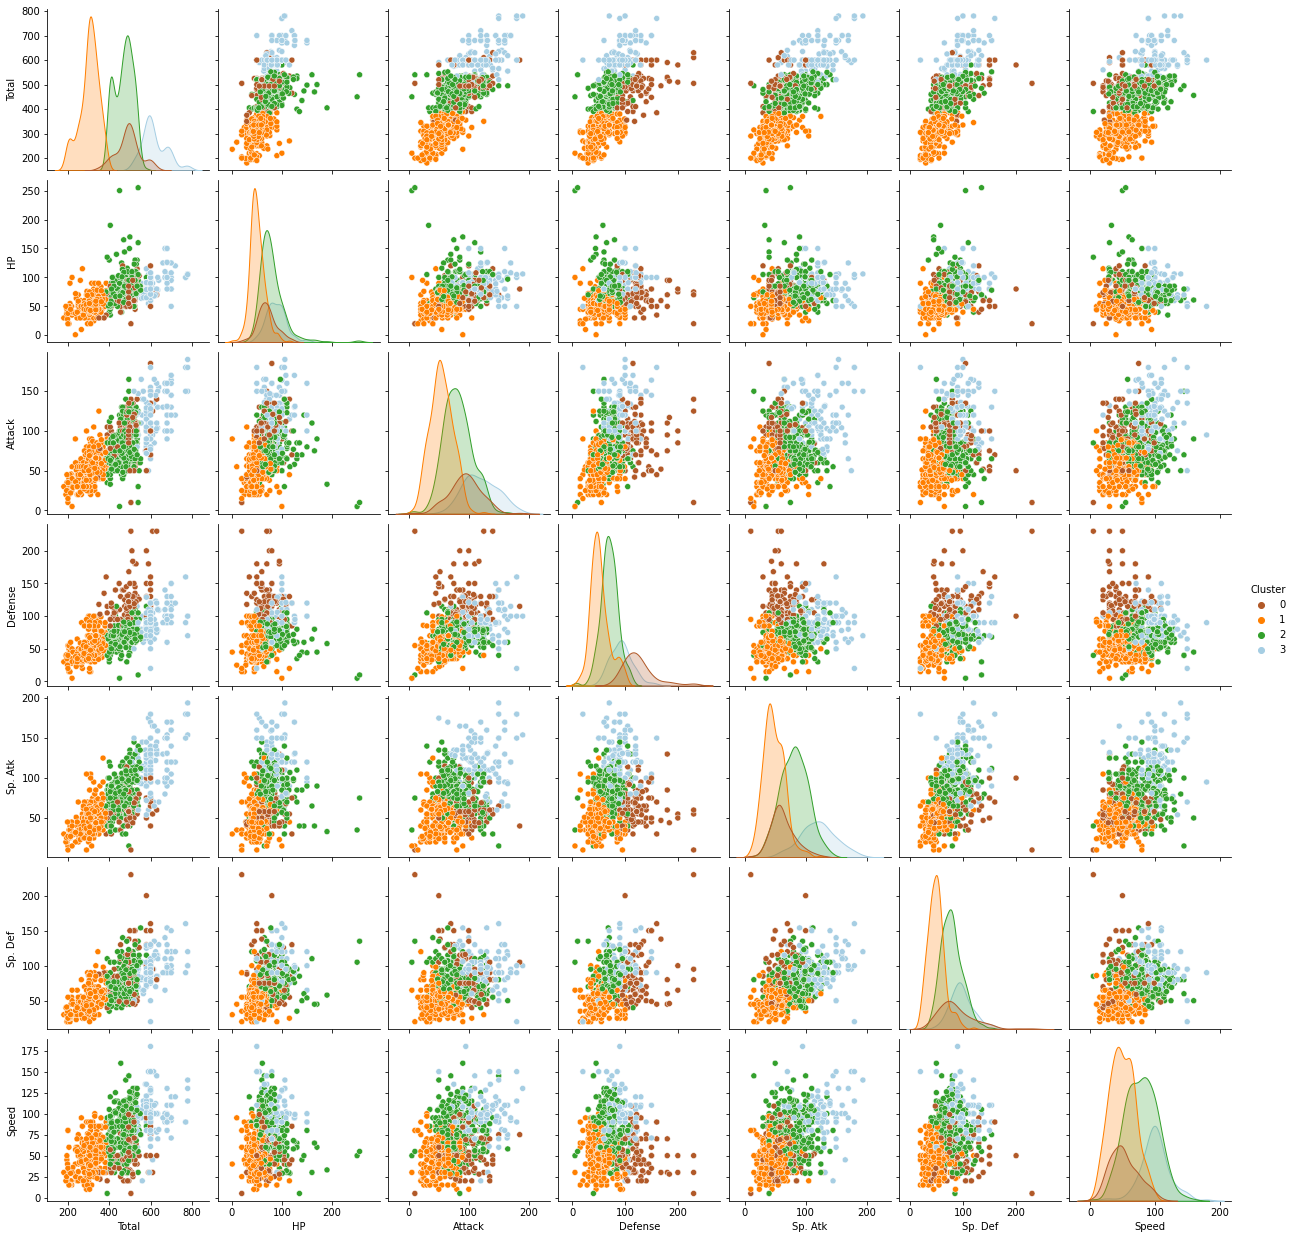

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Cluster']],
             hue = 'Cluster', 
             palette='Paired_r');


We can identify on every stats the Orange cluste 0 : the lowest stats but the where the most population is and on Blue cluster 3 where there is the highest stats and where the population lower.

## Problem 3

We're getting an idea of what our clusters represent, and how their distributions vary. However, we have recently acquired data visualization powers ⚡️, so we'd like to visualize these differences. 

💪 **Task: Visualize some aspect of `cluster_means`. Feel free to focus on a particular column, or to aggregate some of the data. The graph should show some differences between the clusters. Be creative!**   
Pro-tip 1: Don't overthink the chart content, you will mostly be graded on healthy visualization practices.  
Pro-tip 2: Try to use the matplotlib api instead of the `Dataframe.plot` built in pandas. This should give you more control and allow you to create a more effective visualization.  

In [39]:
# From what was done in the bonus question, I'm gonna plot all the stats in radar except Total
# Pipenv install with plotly = "*" in Pipefile required

import plotly.graph_objects as go

labels = ['HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed']
cluster_means_plot = cluster_means.loc[:,labels]

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=cluster_means_plot.loc[0].values.tolist(),
      theta=labels,
      fill='toself',
      name='Cluster 0'
))
fig.add_trace(go.Scatterpolar(
      r=cluster_means_plot.loc[1].values.tolist(),
      theta=labels,
      fill='toself',
      name='Cluster 1'
))
fig.add_trace(go.Scatterpolar(
      r=cluster_means_plot.loc[2].values.tolist(),
      theta=labels,
      fill='toself',
      name='Cluster 2'
))
fig.add_trace(go.Scatterpolar(
      r=cluster_means_plot.loc[3].values.tolist(),
      theta=labels,
      fill='toself',
      name='Cluster 3'
))

fig.update_layout(
    title="Means statistics for each cluster",
    polar=dict(
        radialaxis=dict(
        visible=True,
        range=[0, 130]
    )),
    showlegend=True
)

fig.show()

Not that clean or reusable but i guess it does the work. 

🧠 **Bonus Question: Why you chose this data to plot? Why did you represent it in this particular way?**

I choosed all the data expect total and generation to correlate numerical value between them. Generation is more a label same as Legendary, Total is a mix of all the stats so it will not help.

I used that graph because it's the best way to display statistics in game for example football games. I added a title, didn't change the color palette default one was enough, displayed the legend because stacking on the same radar all the cluster was hidding some informations. 

We can identify :
- Cluster 0 : The defensive pokemons
- Cluster 1 : The worst pokemons
- Cluster 2 : The balanced pokemons
- Cluster 3 : The OP pokemons that will be nerfed in the next version of the meta 😜, with high attack stats and speed.

## Problem 4

We have shown differences in the cluster average statistics with a beautiful graph. Now, we want to visualize the cluster assignments of ALL of the data. However, we have six "stats" columns, and even the world of pokemon is only three dimensional... Prepare for trouble, and make it double, it's time for dimensionality reduction!

💪 **Task: Reduce the dimensions of the pokemon dataset using PCA. Store the principal components in a NumPy `ndarray` called `components`. The unit test will call a `.plot_PCA()` method to display the data points, and their color coded cluster assignments.**   
Pro-tip 1: You should only use the numerical columns: `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, `Speed`, and `HP`.   

Pro-tip 2: Think of how many dimensions you must reduce the dataset to, so that we are able to visualize it. It's the same as we did in class!  

Pro-tip 3: Please use the `random_state=42` argument when constructing your sklearn class, to make sure your results are reproducible. Marks won't be taken off for using the wrong random seed, but the unit tests won't pass!  

Pro-tip 4: We have seen in lectures that sklearn expects NumPy `ndarrays` as argument to its training and prediction methods. Whilst that is true, it can also accept pandas `DataFrames` directly, since these are `ndarray` wrappers. You can use whichever you prefer.  

Pro-tip 5: The `plot_PCA()` method uses the `y_kmeans` predictions to pick marker colors. Make sure you have finished problem 1 and run the cells to make it available here.


In [50]:
from sklearn.decomposition import PCA

labels = ['Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'HP']
components = df.loc[:,labels].to_numpy()

pca = PCA(n_components=2,random_state=42)
pca.fit(components)
components = pca.transform(components)


Success! 🎉


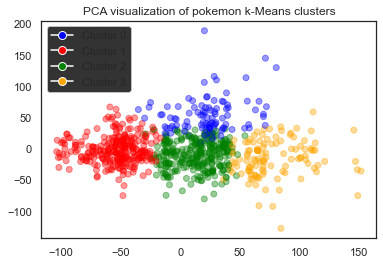

In [51]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

def plot_PCA(components):
    # assign a color to each prediction
    colors = ['blue', 'red', 'green', 'orange']
    features_colors = [colors[y] for y in y_kmeans]

    # plot the PCA components
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(components[:, 0], components[:, 1],
                c=features_colors, marker='o',
                alpha=0.4)
    
    ax.set_title('PCA visualization of pokemon k-Means clusters')

    legends = [legend(i, c) for i, c in enumerate(colors)]
    ax.legend(handles=legends, loc='upper left')
    
    plt.show()

def legend(i, color):
    return Line2D([0], [0], marker='o', color='w', label=f'Cluster {i}',markerfacecolor=color, markersize=8)

def test_pca():
    rows, columns = components.shape
    assert columns == 2, f'Your components have {columns} dimensions. In order to visualise the data, we expect 2 dimensions.'
    assert rows == 800, f'Your components have {rows} data points, but 800 are expected, one per pokemon.'
    assert math.isclose(components[42, 1], -18.321118, rel_tol=1e-5), f'Something is not quite right with your dimensional reduction. Have you used a random seed of 42?'
    print('Success! 🎉')
    plot_PCA(components)
    
test_pca()

🧠 **Bonus Question: Do you think this matches the results of problem 2? Why? What do the 2 principal axes seem to represent?**

It looks like what i tried to do with pairplot. 4 cluster are identified 2 of them are average and the 2 others :
- indicate a low difference in stat and a high population
- while the other has a bigger ditribution and stat with a low population

Looks like axes seems to represent the difference between the lowest stats and the highest one.

## Problem 5

An Old man once told you how to catch Weedles. 🐛 But he also said that winning battles comes down to unique fighting styles. We want to find the pokemons that stand out the most from the rest.

💪 **Task: Use gaussian distribution anomaly detection to identify the top 1% of most unique pokemons. Use the resulting predictions vector to filter our `df` `DataFrame`, and save the outlier pokemons in a new `DataFrame` called `outliers`.**   
Pro-tip 1: You should only use the numerical columns: `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, `Speed`, and `HP`. 


Pro-tip 2: Please use the `random_state=42` argument when constructing your sklearn class, to make sure your results are reproducible. Marks won't be taken off for using the wrong random seed, but the unit tests won't pass!  

Pro-tip 3: We have seen in lectures that sklearn expects NumPy ndarrays as argument to its training and prediction methods. Whilst that is true, it can also accept pandas DataFrames directly, since these are ndarray wrappers. So use whichever you prefer.  


Pro-tip 4: Remember that the `contamination` argument changes the percentage of our dataset we expect to be outliers.


Pro-tip 5: It could help to add the predictions in an `Outlier` column to the original `df`, to make the filtering of the anomalous pokemons easier 🙃 


In [75]:
from sklearn.covariance import EllipticEnvelope

labels = ['Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'HP']
components = df.loc[:,labels]

cov = EllipticEnvelope(contamination=0.01, random_state=42).fit(components)
df['Outlier'] = cov.predict(components)
        
outliers = df.loc[df['Outlier'] == -1]

In [76]:
def test_anomaly_detection():
    assert len(outliers) == 8, f'You found {len(outliers)} outliers, but we expected 800 * 1% = 8' 
    assert outliers['Total'].sum() == 4284, f'Something is not quite right with your anomaly detection. Have you used a random seed of 42?'
    print('Success! 🎉')
    return outliers
    
test_anomaly_detection()

Success! 🎉


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Cluster,Outlier
98,91,Cloyster,Water,Ice,525,50,95,180,85,45,70,1,False,0,-1
121,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False,2,-1
223,208,Steelix,Steel,Ground,510,75,85,200,55,65,30,2,False,0,-1
224,208,SteelixMega Steelix,Steel,Ground,610,75,125,230,55,95,30,2,False,0,-1
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False,0,-1
261,242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False,2,-1
333,306,AggronMega Aggron,Steel,NaN,630,70,140,230,60,80,50,3,False,0,-1
789,713,Avalugg,Ice,NaN,514,95,117,184,44,46,28,6,False,0,-1


🧠 **Bonus Question: Is this what you expected? Can you explain why these pokemons are outliers? Can you spot a pattern?**

I was expecting a correletion between these top 1% and the fact that they are Legendary or not. I was expecting also a lot of cluster 3 pokemons but it's seems that the cluster 0, the defensive one are the top 1%.

They seems to be outlier because of their high Defense or HP. 

The only pattern i can identify is that these pokemons have > 180 on Defense or > 240 in HP. The total of their stat are naturaly high. Nothing else to say.